## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import kurtosis, skew

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_data(data_path: str):
  data = pd.read_csv(data_path, sep=';')
  return data

data = get_data(data_path="bank-additional-full.csv")

print("Основна статистична інформація по числовим змінним:")
print(data.describe())

print("\nРозмірність датасету:")
print(data.shape)


Основна статистична інформація по числовим змінним:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
st

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [4]:
bank_target = data.columns[-1]

if data[bank_target].dtype == 'object':
    data[bank_target], _ = pd.factorize(data[bank_target])



## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [5]:
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

for column in bank_client.columns:

    print(f"Унікальні значення для атрибуту '{column}': {bank_client[column].unique()}")


Унікальні значення для атрибуту 'age': [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Унікальні значення для атрибуту 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Унікальні значення для атрибуту 'marital': ['married' 'single' 'divorced' 'unknown']
Унікальні значення для атрибуту 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Унікальні значення для атрибуту 'default': ['no' 'unknown' 'yes']
Унікальні значення для атрибуту 'housing': ['no' 'yes' 'unknown']
Унікальні значення для атрибуту 'loan': ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Максимальне значення віку: 98
Мінімальне значення віку: 17
Кількість пропущених значень у стовпці Age: 0


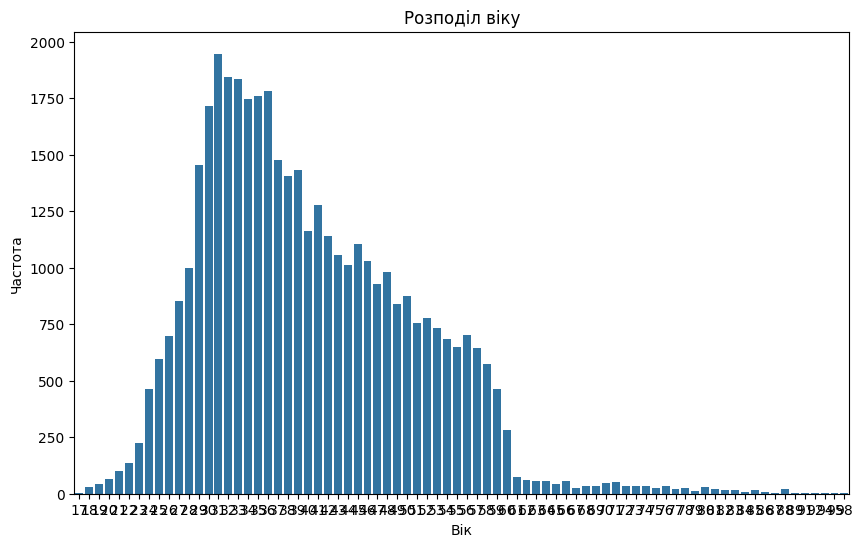

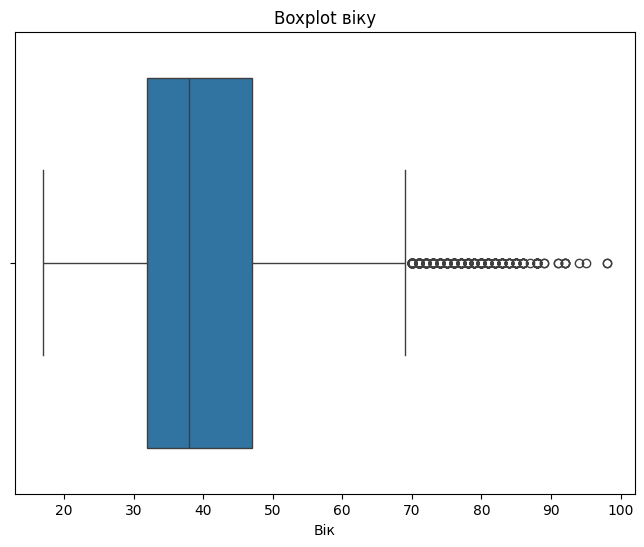

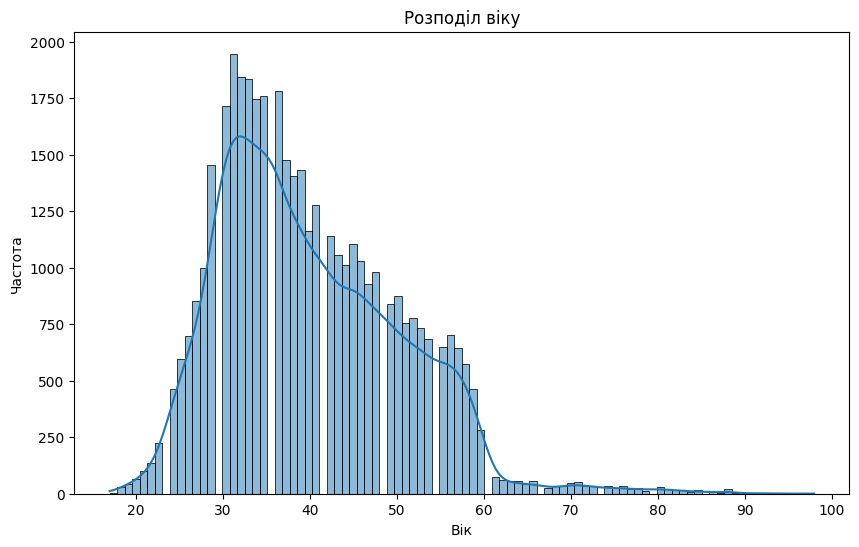

Ексцес: 0.7910698035273853
Скошеність: 0.7846682380932289


In [6]:
print("Максимальне значення віку:", data['age'].max())
print("Мінімальне значення віку:", data['age'].min())

nan_values = data['age'].isnull().sum()
print("Кількість пропущених значень у стовпці Age:", nan_values)

#countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age')
plt.title('Розподіл віку')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='age')
plt.title('Boxplot віку')
plt.xlabel('Вік')
plt.show()

#distplot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True)
plt.title('Розподіл віку')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

#Перевірка на важкі хвости
kurt = kurtosis(data['age'])
skewness = skew(data['age'])

print("Ексцес:", kurt)
print("Скошеність:", skewness)

**Висновки з 1-4 завдання (детальні)**

Завдання 1:
Я завантажив датасет bank-additional-full.csv за допомогою функції get_data, використовув describe(), щоб отримати загальну інформацію про числові змінні. 

Завдання 2: Визначив цільовий атрибут як останній стовпець у датасеті.
Перевіривши тип цільового атрибуту, я перетворив його з категоріального на числовий, використовуючи factorize.

Завдання 3: Виділив всі атрибути, що стосуються клієнтів банку у окрему змінну bank_client.
Перевірив унікальні значення для кожного атрибуту в bank_client і вивів їх.

Завдання 4: Вивів максимальне та мінімальне значення віку у вибірці.
Перевірив наявність пропущених значень у стовпці віку.
Побудував графік змінної Age за допомогою countplot, boxplot та distplot.
Перевірив розподіл по змінній Age на важкі хвости і отримав значення ексцесу і скошеності.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [7]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers
    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers

In [8]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

Я використав функцію detect_outliers_with_interquantile_range, з її допомогою посортував значення, обчислив квартилі і розрахував IQR, потім вивів викиди


**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

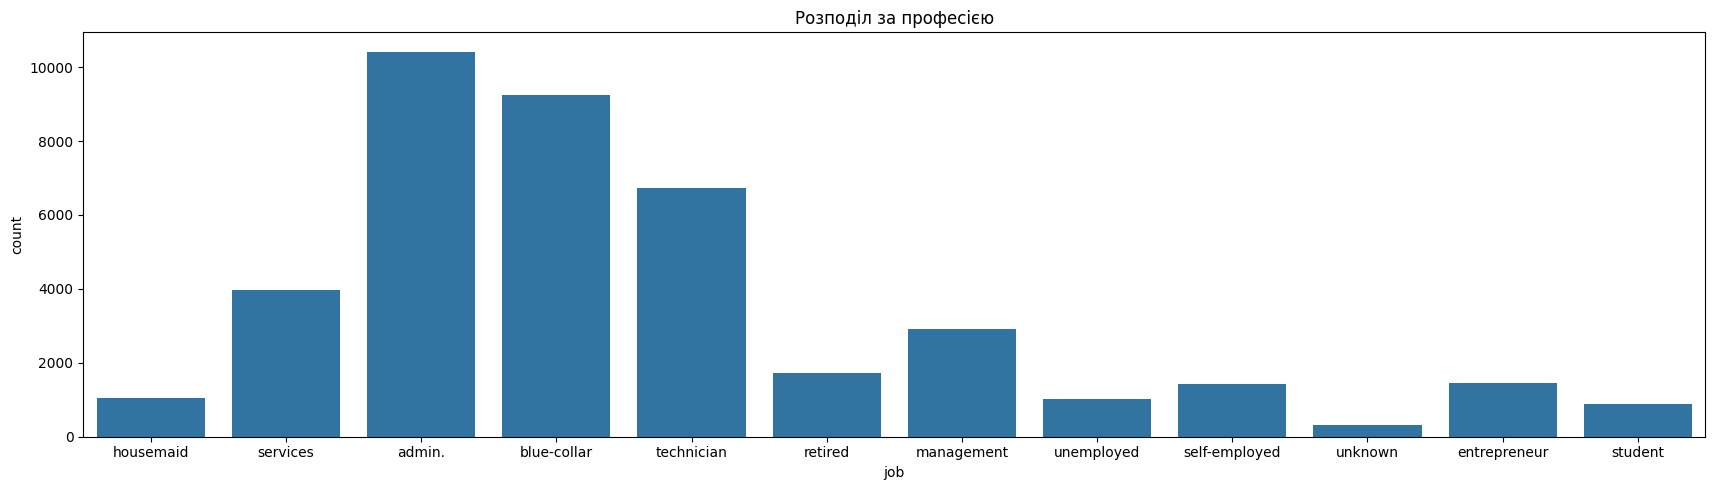

In [9]:
plt.figure(figsize=(50, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=data, x='job')
plt.title('Розподіл за професією')

plt.tight_layout()
plt.show()

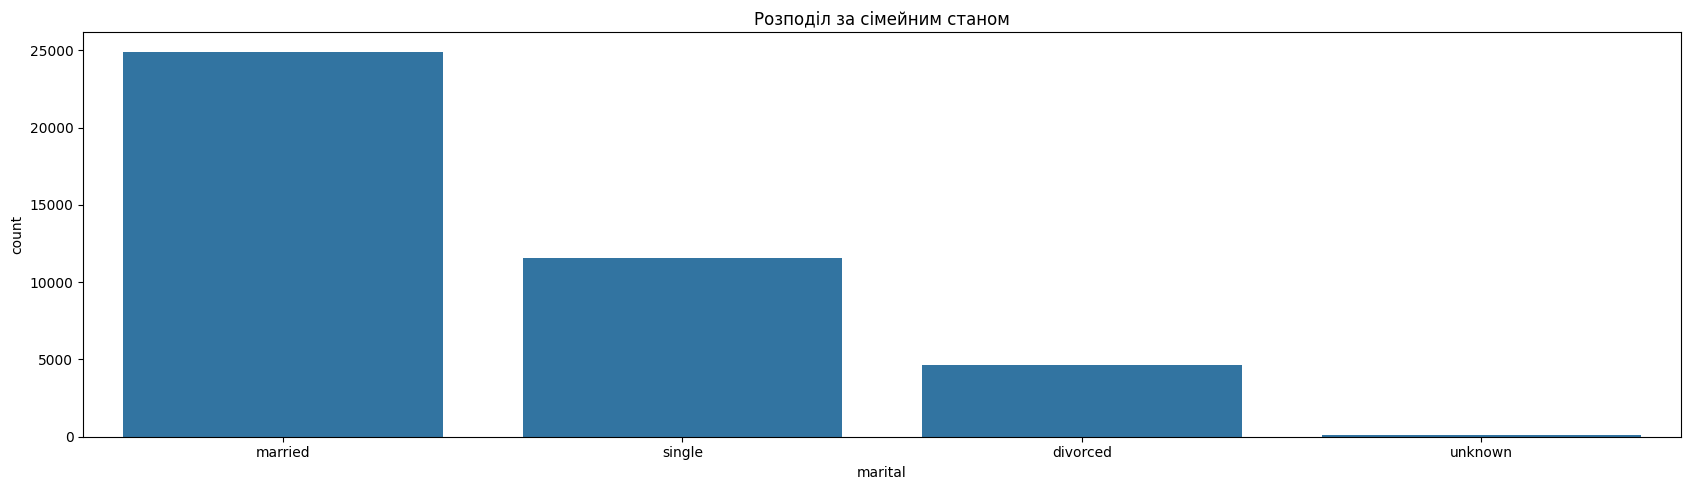

In [56]:
plt.figure(figsize=(50, 5))

plt.subplot(1, 3, 2)
sns.countplot(data=data, x='marital')
plt.title('Розподіл за сімейним станом')

plt.tight_layout()
plt.show()

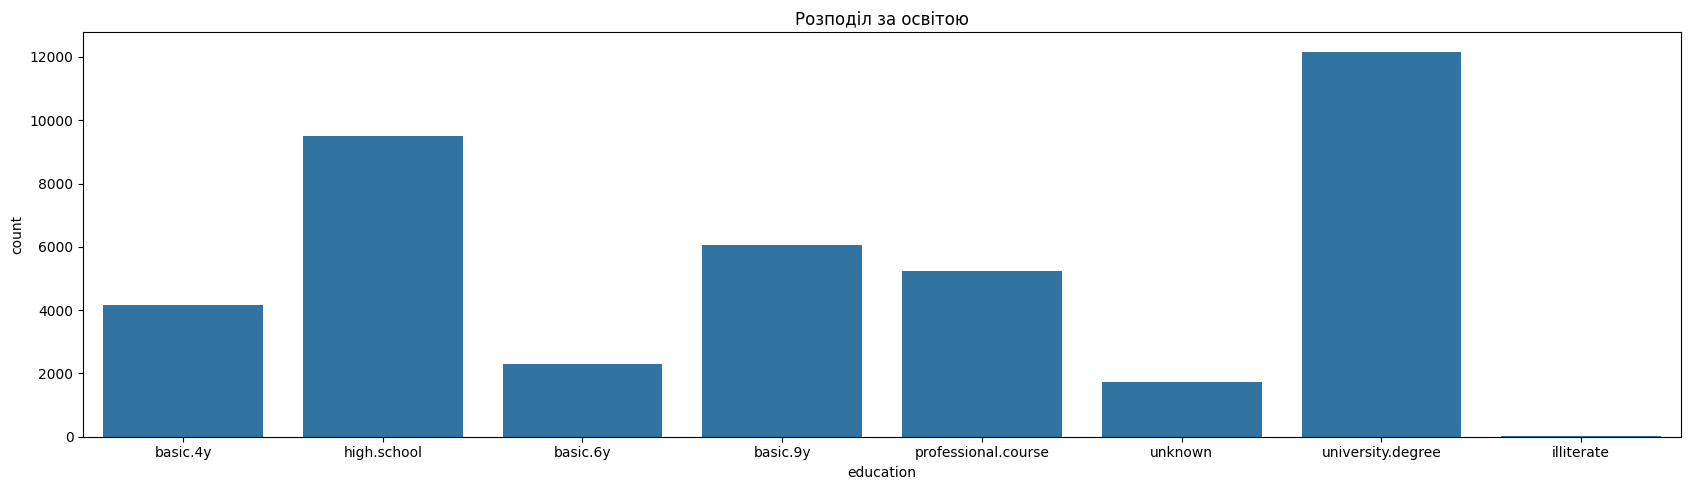

In [10]:
plt.figure(figsize=(50, 5))

plt.subplot(1, 3, 3)
sns.countplot(data=data, x='education')
plt.title('Розподіл за освітою')

plt.tight_layout()
plt.show()

**Висновки з завдання 6 (детальні)**

Я побудував графіки countplot розподілу змінних `job`, `marital` та `education` і отримав розподіл клієнтів по професії, сімейному стану та освітою, побачив інсайти

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

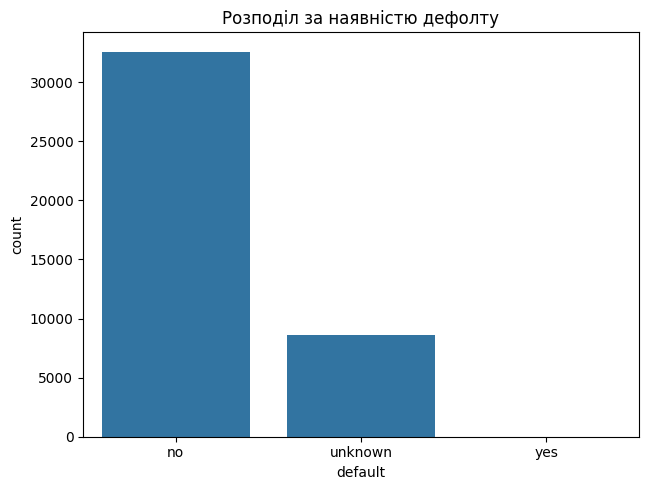

In [11]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=data, x='default')
plt.title('Розподіл за наявністю дефолту')

plt.tight_layout()
plt.show()

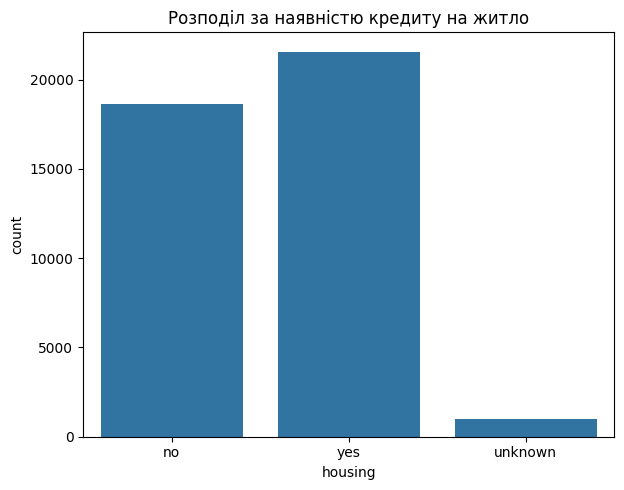

In [59]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 2)
sns.countplot(data=data, x='housing')
plt.title('Розподіл за наявністю кредиту на житло')

plt.tight_layout()
plt.show()

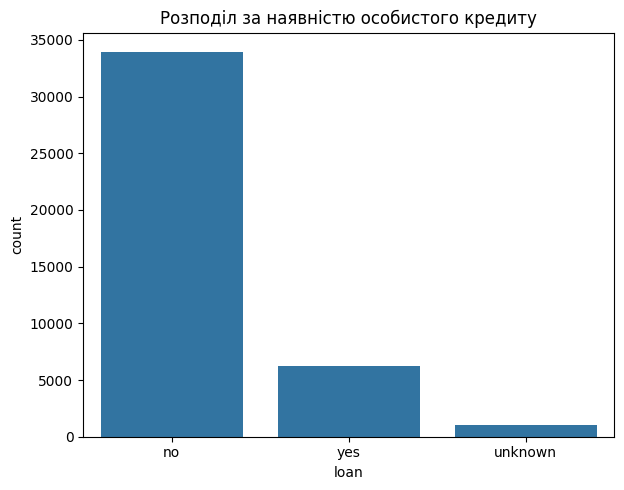

In [12]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.countplot(data=data, x='loan')
plt.title('Розподіл за наявністю особистого кредиту')

plt.tight_layout()
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [13]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col].notnull()
        df.loc[not_null, col] = le.fit_transform(df.loc[not_null, col])  
    return df

In [66]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [14]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  dataframe[age_col] = pd.qcut(dataframe[age_col], q=4, labels=False)
          
  return dataframe

In [15]:
bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Я використав функцію pd.qcut, щоб розділити значення змінної Age на рівні квартилі. Це зробило дані менш різноманітними і легшими для аналізу. Після цього я порівняв трансформовані значення Age з оригінальними, щоб переконатися, що нічого не втрачено. 

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [16]:
bank_relat = data[['contact', 'month', 'day_of_week', 'duration']]

print(bank_relat.head())

print("\nПеревірка на пропущені значення:")
print(bank_relat.isnull().sum())

     contact month day_of_week  duration
0  telephone   may         mon       261
1  telephone   may         mon       149
2  telephone   may         mon       226
3  telephone   may         mon       151
4  telephone   may         mon       307

Перевірка на пропущені значення:
contact        0
month          0
day_of_week    0
duration       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [17]:
unique_contacts = data['contact'].unique()
unique_months = data['month'].unique()
unique_days_of_week = data['day_of_week'].unique()

print("Унікальні значення атрибута 'contact':", unique_contacts)
print("\nУнікальні значення атрибута 'month':", unique_months)
print("\nУнікальні значення атрибута 'day_of_week':", unique_days_of_week)

Унікальні значення атрибута 'contact': ['telephone' 'cellular']

Унікальні значення атрибута 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Унікальні значення атрибута 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



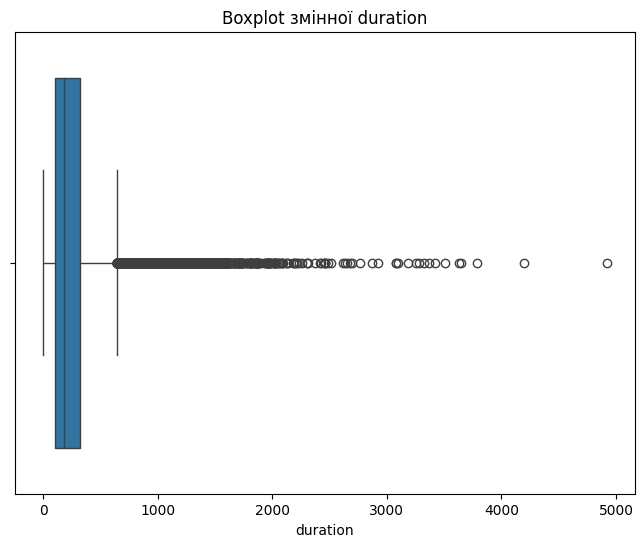

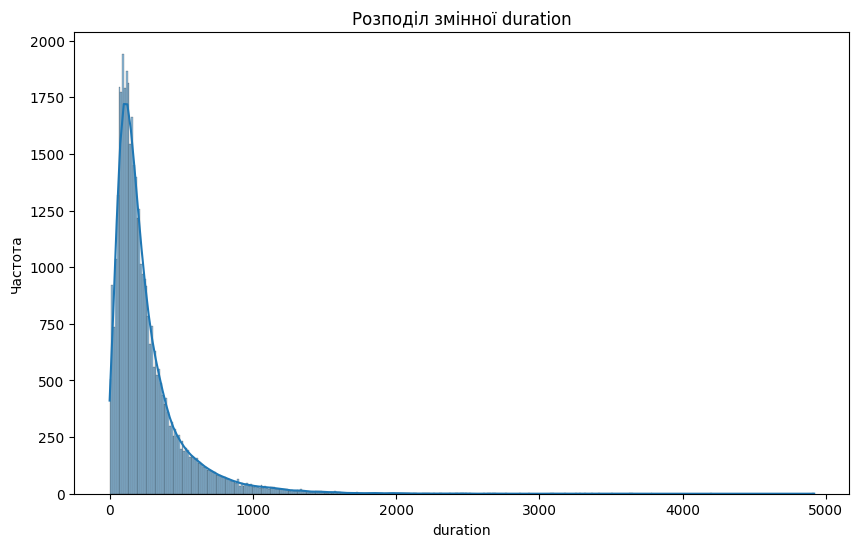

Ексцес: 20.245334438614844
Скошеність: 3.2630224157610432


In [84]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='duration')
plt.title('Boxplot змінної duration')
plt.xlabel('duration')
plt.show()

#distplot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', kde=True)
plt.title('Розподіл змінної duration')
plt.xlabel('duration')
plt.ylabel('Частота')
plt.show()

# Перевірка розподілу на важкі хвости
kurt = kurtosis(data['duration'])
skewness = skew(data['duration'])
print("Ексцес:", kurt)
print("Скошеність:", skewness)

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [18]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [19]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  
  Q1 = dataframe[duration_col].quantile(0.25)
  Q2 = dataframe[duration_col].quantile(0.50)
  Q3 = dataframe[duration_col].quantile(0.75)

  dataframe[duration_col] = pd.cut(dataframe[duration_col], bins=[0, Q1, Q2, Q3, np.inf], labels=[1, 2, 3, 4])
  
  return dataframe

In [20]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [21]:
bank_socec = data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [22]:
bank_other = data[['campaign', 'pdays', 'previous', 'poutcome']]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [23]:
bank_other = pd.get_dummies(bank_other, columns=['poutcome'], drop_first=True)

## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [24]:
bank_final = pd.concat([bank_client, bank_relat, bank_other, bank_socec], axis=1)
print(bank_final.head())

   age        job  marital    education  default housing loan contact month  \
0    3  housemaid  married     basic.4y       no      no   no       1     6   
1    3   services  married  high.school  unknown      no   no       1     6   
2    1   services  married  high.school       no     yes   no       1     6   
3    2     admin.  married     basic.6y       no      no   no       1     6   
4    3   services  married  high.school       no      no  yes       1     6   

  day_of_week  ... pdays  previous  y  poutcome_nonexistent  poutcome_success  \
0           1  ...   999         0  0                  True             False   
1           1  ...   999         0  0                  True             False   
2           1  ...   999         0  0                  True             False   
3           1  ...   999         0  0                  True             False   
4           1  ...   999         0  0                  True             False   

   emp.var.rate  cons.price.idx  cons.

**Завдання 19** Провести ділення вибірки

In [36]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test, k_fold

In [37]:
target = data['y']
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [44]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
    X_train_encoded = pd.get_dummies(X_train)
    X_test_encoded = pd.get_dummies(X_test)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train_encoded)
    X_test = sc_X.transform(X_test_encoded)

    return X_train, X_test

In [45]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [46]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7279    0]
 [   0  959]]
100.0


## k-NN

k=1 95.84 (+/- 0.32)
k=2 94.72 (+/- 0.30)
k=3 96.42 (+/- 0.47)
k=4 95.52 (+/- 0.44)
k=5 96.46 (+/- 0.44)
k=6 95.63 (+/- 0.42)
k=7 96.29 (+/- 0.43)
k=8 95.45 (+/- 0.40)
k=9 96.10 (+/- 0.45)
k=10 95.38 (+/- 0.46)
k=11 95.98 (+/- 0.38)
k=12 95.43 (+/- 0.41)
k=13 95.84 (+/- 0.40)
k=14 95.32 (+/- 0.47)
k=15 95.68 (+/- 0.40)
k=16 95.21 (+/- 0.44)
k=17 95.56 (+/- 0.30)
k=18 95.11 (+/- 0.39)
k=19 95.39 (+/- 0.38)
k=20 95.00 (+/- 0.45)
k=21 95.31 (+/- 0.41)
k=22 94.93 (+/- 0.48)
k=23 95.22 (+/- 0.44)
k=24 94.91 (+/- 0.49)
k=25 95.17 (+/- 0.45)
The optimal number of neighbors is 4 with 96.5%


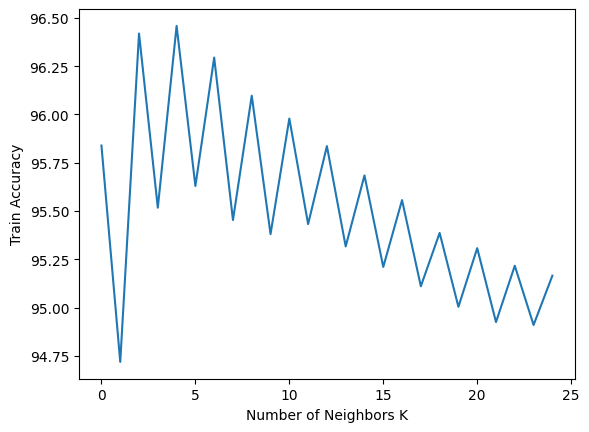

In [48]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [49]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7256   23]
 [ 354  605]]
95.0


## Логістична Регресія

In [53]:
model_names = ['Logistic Regression', 'k-NN']
models = pd.DataFrame({
                'Models': model_names,
                'Score':  [accuracy_score(y_test, logpred), accuracy_score(y_test, knnpred)]})

models.sort_values(by='Score', ascending=False)


,Models,Score
0,Logistic Regression,1.000000
1,k-NN,0.954236


**Висновки по моделям (детальні)**

Я використав два методи для класифікації даних: логістична регресія і метод k-найближчих сусідів (k-NN). Після тренування моделей та їх використання для передбачення результатів на тестових даних, я порівняв їх ефективність.

Логістична регресія показала кращі результати: вона була точнішою та стабільнішою під час тестування на нових даних. Отже, для цього завдання класифікації дані модель логістичної регресії була найкращим варіантом.